Φορτώνουμε τις βιβλιοθήκες και τα εργαλεία που θα χρειαστούμε.

In [ ]:
#Βιβλιοθήκες που χρησιμοποιήθηκαν για την ενδιάμεση εργασία.
import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import accuracy_score

#Πρόσθετες βιβλιοθήκες που χρησιμοποιήθηκαν για την τελική εργασία.
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

%matplotlib inline
np.random.seed(42)

Φορτώνουμε το dataset.

In [ ]:
from keras.datasets import mnist
(x_train, y_train), (x_test,y_test)=mnist.load_data()

Θα ελέγχξουμε τη διάσταση των x_train, x_test, y_train, y_test.

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


Οπτικοποίηση δεδομένων εισόδου.

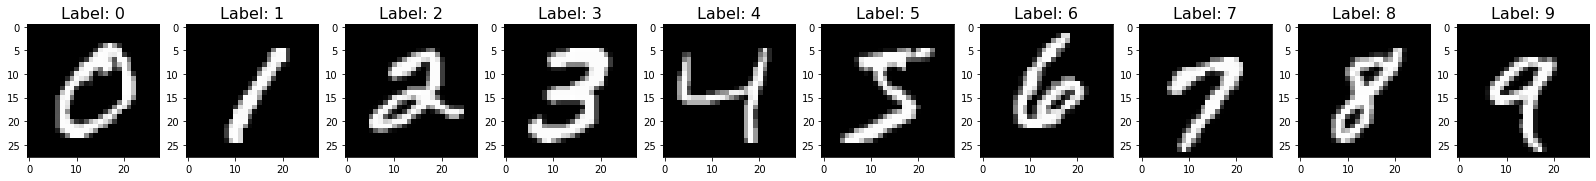

In [ ]:
f, ax = plt.subplots(1, 10, figsize=(28,28))

for i in range (0,10):
  sample=x_train[y_train==i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title('Label: {}'.format(i), fontsize=16)

Ας δούμε και τη μορφή έχουν τα labels.

In [ ]:
for i in range(10):
  print(y_train[i])

5
0
4
1
9
2
1
3
1
4


Κανονικοποιήσεις και μορφοποιήσεις στα train και test sets.

In [ ]:
#Μετατροπή των x_train, x_test σε διάνυσμα.
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)
print(x_train.shape)
print(x_test.shape)

#Kανονικοποιούμε τα δεδομένα εισόδου.
x_train = x_train / 255.0
x_test = x_test / 255.

#One hot κωδικοποίηση των labels.
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)
for i in range(10):
  print(y_train[i])


(60000, 784)
(10000, 784)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


Τρέχουμε τον classifier KNN για n=1 και τυπώνουμε accuracy.

In [ ]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(x_train, y_train)

preds = model.predict(x_test)
accuracy = accuracy_score(y_test, preds)
print(accuracy)

0.9691


Τρέχουμε τον classifier KNN για n=3 και τυπώνουμε accuracy.

In [ ]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train, y_train)

preds = model.predict(x_test)
accuracy = accuracy_score(y_test, preds)
print(accuracy)

0.9695


Τρέχουμε τον classifier πλησιέστερου κέντρου και τυπώνουμε accuracy.

In [ ]:
model = NearestCentroid()
model.fit(x_train, y_train)

preds = model.predict(x_test)
accuracy = accuracy_score(y_test, preds)
print(accuracy)

Στήνουμε το Νευρωνικό Δίκτυο.

In [ ]:
model = Sequential()
model.add(Dense(64, input_shape=(784,), activation='sigmoid'))
model.add(Dense(units=10, activation='softmax'))

sgd = SGD(lr=0.001)

model.compile(loss= 'mean_squared_error', optimizer=sgd, metrics=['accuracy'])

Θα εκπαιδεύσουμε το Νευρωνικό Δίκτυο.

In [ ]:
model.fit(x=x_train, y=y_train, batch_size=64, epochs=50, verbose=2)

Epoch 1/50
938/938 - 1s - loss: 0.0945 - accuracy: 0.0992
Epoch 2/50
938/938 - 1s - loss: 0.0937 - accuracy: 0.0992
Epoch 3/50
938/938 - 1s - loss: 0.0932 - accuracy: 0.0992
Epoch 4/50
938/938 - 1s - loss: 0.0929 - accuracy: 0.0993
Epoch 5/50
938/938 - 1s - loss: 0.0926 - accuracy: 0.0997
Epoch 6/50
938/938 - 1s - loss: 0.0924 - accuracy: 0.1007
Epoch 7/50
938/938 - 1s - loss: 0.0922 - accuracy: 0.1022
Epoch 8/50
938/938 - 1s - loss: 0.0920 - accuracy: 0.1042
Epoch 9/50
938/938 - 1s - loss: 0.0918 - accuracy: 0.1073
Epoch 10/50
938/938 - 1s - loss: 0.0917 - accuracy: 0.1105
Epoch 11/50
938/938 - 1s - loss: 0.0915 - accuracy: 0.1143
Epoch 12/50
938/938 - 1s - loss: 0.0914 - accuracy: 0.1175
Epoch 13/50
938/938 - 1s - loss: 0.0913 - accuracy: 0.1209
Epoch 14/50
938/938 - 1s - loss: 0.0912 - accuracy: 0.1248
Epoch 15/50
938/938 - 1s - loss: 0.0911 - accuracy: 0.1280
Epoch 16/50
938/938 - 1s - loss: 0.0910 - accuracy: 0.1314
Epoch 17/50
938/938 - 1s - loss: 0.0909 - accuracy: 0.1342
Epoch 

Εκπαίδευση για άλλες 50 εποχές.


In [ ]:
model.fit(x=x_train, y=y_train, batch_size=64, epochs=50, verbose=2)

Epoch 1/50
938/938 - 1s - loss: 0.0881 - accuracy: 0.2634
Epoch 2/50
938/938 - 1s - loss: 0.0881 - accuracy: 0.2687
Epoch 3/50
938/938 - 1s - loss: 0.0880 - accuracy: 0.2750
Epoch 4/50
938/938 - 1s - loss: 0.0879 - accuracy: 0.2816
Epoch 5/50
938/938 - 1s - loss: 0.0879 - accuracy: 0.2883
Epoch 6/50
938/938 - 1s - loss: 0.0878 - accuracy: 0.2952
Epoch 7/50
938/938 - 1s - loss: 0.0877 - accuracy: 0.3016
Epoch 8/50
938/938 - 1s - loss: 0.0876 - accuracy: 0.3079
Epoch 9/50
938/938 - 1s - loss: 0.0876 - accuracy: 0.3137
Epoch 10/50
938/938 - 1s - loss: 0.0875 - accuracy: 0.3206
Epoch 11/50
938/938 - 1s - loss: 0.0874 - accuracy: 0.3267
Epoch 12/50
938/938 - 1s - loss: 0.0874 - accuracy: 0.3331
Epoch 13/50
938/938 - 1s - loss: 0.0873 - accuracy: 0.3381
Epoch 14/50
938/938 - 1s - loss: 0.0872 - accuracy: 0.3432
Epoch 15/50
938/938 - 1s - loss: 0.0871 - accuracy: 0.3478
Epoch 16/50
938/938 - 1s - loss: 0.0871 - accuracy: 0.3525
Epoch 17/50
938/938 - 1s - loss: 0.0870 - accuracy: 0.3568
Epoch 

Αξιολόγηση.

In [ ]:
print('Train accuracy:', model.evaluate(x_train,y_train, batch_size=64))
print('Test accuracy:', model.evaluate(x_test,y_test, batch_size=64))

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_classes)

y_pred = model.predict(x_train)
print(y_pred[0], np.argmax(y_pred[0]))

938/938 [==============================] - 1s 1ms/step - loss: 0.0847 - accuracy: 0.4487
Train accuracy: [0.0846811905503273, 0.44874998927116394]
157/157 [==============================] - 0s 1ms/step - loss: 0.0845 - accuracy: 0.4698
Test accuracy: [0.08452263474464417, 0.4697999954223633]
[[0.100535   0.11834761 0.08643265 ... 0.14587772 0.08414117 0.10263642]
 [0.1036663  0.12465599 0.14154965 ... 0.10521978 0.0907284  0.06006595]
 [0.07839938 0.14581019 0.09441604 ... 0.12234196 0.08026733 0.10905214]
 ...
 [0.09055601 0.11930146 0.07462403 ... 0.11668574 0.08824724 0.1098386 ]
 [0.10782763 0.11270901 0.10348586 ... 0.11898185 0.10772541 0.07370284]
 [0.18358822 0.0841886  0.10191098 ... 0.06398689 0.08957966 0.09662915]]
[7 2 1 ... 4 7 0]
[0.14639413 0.10051658 0.08741454 0.10331482 0.08260627 0.09389981
 0.08990829 0.11344574 0.09843311 0.0840667 ] 0


Αλλαγή MSE σε CrossEntropy.


In [ ]:
model = Sequential()
model.add(Dense(64, input_shape=(784,), activation='sigmoid'))
model.add(Dense(units=10, activation='softmax'))

sgd = SGD(lr=0.001)

model.compile(loss= 'categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

Εκπαίδευση του Νευρωνικού δικτύου με τη νέα loss function.

In [ ]:
model.fit(x=x_train, y=y_train, batch_size=64, epochs=50, verbose=2)

Epoch 1/50
938/938 - 1s - loss: 2.2777 - accuracy: 0.1968
Epoch 2/50
938/938 - 1s - loss: 2.1511 - accuracy: 0.4122
Epoch 3/50
938/938 - 1s - loss: 2.0552 - accuracy: 0.5149
Epoch 4/50
938/938 - 1s - loss: 1.9640 - accuracy: 0.5715
Epoch 5/50
938/938 - 1s - loss: 1.8763 - accuracy: 0.6137
Epoch 6/50
938/938 - 1s - loss: 1.7917 - accuracy: 0.6418
Epoch 7/50
938/938 - 1s - loss: 1.7103 - accuracy: 0.6668
Epoch 8/50
938/938 - 1s - loss: 1.6324 - accuracy: 0.6876
Epoch 9/50
938/938 - 1s - loss: 1.5583 - accuracy: 0.7033
Epoch 10/50
938/938 - 1s - loss: 1.4881 - accuracy: 0.7179
Epoch 11/50
938/938 - 1s - loss: 1.4221 - accuracy: 0.7325
Epoch 12/50
938/938 - 1s - loss: 1.3602 - accuracy: 0.7442
Epoch 13/50
938/938 - 1s - loss: 1.3024 - accuracy: 0.7541
Epoch 14/50
938/938 - 1s - loss: 1.2486 - accuracy: 0.7640
Epoch 15/50
938/938 - 1s - loss: 1.1986 - accuracy: 0.7709
Epoch 16/50
938/938 - 1s - loss: 1.1523 - accuracy: 0.7779
Epoch 17/50
938/938 - 1s - loss: 1.1095 - accuracy: 0.7860
Epoch 

Εκπαίδευση για άλλες 50 εποχές.

In [ ]:
model.fit(x=x_train, y=y_train, batch_size=64, epochs=50, verbose=2)

Epoch 1/50
938/938 - 1s - loss: 0.5597 - accuracy: 0.8681
Epoch 2/50
938/938 - 1s - loss: 0.5538 - accuracy: 0.8691
Epoch 3/50
938/938 - 1s - loss: 0.5482 - accuracy: 0.8700
Epoch 4/50
938/938 - 1s - loss: 0.5427 - accuracy: 0.8708
Epoch 5/50
938/938 - 1s - loss: 0.5375 - accuracy: 0.8715
Epoch 6/50
938/938 - 1s - loss: 0.5324 - accuracy: 0.8724
Epoch 7/50
938/938 - 1s - loss: 0.5275 - accuracy: 0.8733
Epoch 8/50
938/938 - 1s - loss: 0.5228 - accuracy: 0.8742
Epoch 9/50
938/938 - 1s - loss: 0.5182 - accuracy: 0.8750
Epoch 10/50
938/938 - 1s - loss: 0.5138 - accuracy: 0.8759
Epoch 11/50
938/938 - 1s - loss: 0.5095 - accuracy: 0.8764
Epoch 12/50
938/938 - 1s - loss: 0.5053 - accuracy: 0.8769
Epoch 13/50
938/938 - 1s - loss: 0.5013 - accuracy: 0.8775
Epoch 14/50
938/938 - 1s - loss: 0.4974 - accuracy: 0.8779
Epoch 15/50
938/938 - 1s - loss: 0.4936 - accuracy: 0.8787
Epoch 16/50
938/938 - 1s - loss: 0.4900 - accuracy: 0.8793
Epoch 17/50
938/938 - 1s - loss: 0.4864 - accuracy: 0.8797
Epoch 

Αξιολόγηση.





In [ ]:
print('Train accuracy:', model.evaluate(x_train,y_train, batch_size=64))
print('Test accuracy:', model.evaluate(x_test,y_test, batch_size=64))

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_classes)

y_pred = model.predict(x_train)
print(y_pred[0], np.argmax(y_pred[0]))

938/938 [==============================] - 1s 1ms/step - loss: 0.4071 - accuracy: 0.8927
Train accuracy: [0.40710240602493286, 0.8926666378974915]
157/157 [==============================] - 0s 1ms/step - loss: 0.3911 - accuracy: 0.8986
Test accuracy: [0.39107659459114075, 0.8985999822616577]
[[4.0076129e-04 5.3409061e-05 5.9422996e-04 ... 9.8505986e-01
  3.2263985e-04 1.0135665e-02]
 [7.7361211e-02 4.0720254e-03 6.5550941e-01 ... 1.0582840e-04
  1.8237000e-02 1.3497581e-04]
 [1.3060213e-04 9.3410867e-01 2.1419043e-02 ... 6.7914086e-03
  1.0696293e-02 2.7631901e-03]
 ...
 [4.4817454e-05 8.7517442e-04 4.5842197e-04 ... 1.4776316e-02
  2.9511306e-02 1.9402395e-01]
 [1.5071713e-02 1.9912317e-02 4.7496213e-03 ... 6.1636888e-03
  3.3770427e-01 3.9706128e-03]
 [7.9912106e-03 1.9098377e-05 1.0935625e-02 ... 1.4211332e-05
  3.7392773e-04 8.7944660e-05]]
[7 2 1 ... 4 5 6]
[4.1645385e-02 2.4832143e-03 1.0554632e-02 3.7121600e-01 1.9602335e-04
 5.3218019e-01 4.4692424e-03 1.7009418e-02 1.5491673e-

Εκπαιδεύουμε για άλλες 50 εποχές.

In [ ]:
model.fit(x=x_train, y=y_train, batch_size=64, epochs=50, verbose=2)

Epoch 1/50
938/938 - 1s - loss: 0.4064 - accuracy: 0.8929
Epoch 2/50
938/938 - 1s - loss: 0.4048 - accuracy: 0.8932
Epoch 3/50
938/938 - 1s - loss: 0.4033 - accuracy: 0.8934
Epoch 4/50
938/938 - 1s - loss: 0.4018 - accuracy: 0.8937
Epoch 5/50
938/938 - 1s - loss: 0.4003 - accuracy: 0.8941
Epoch 6/50
938/938 - 1s - loss: 0.3988 - accuracy: 0.8942
Epoch 7/50
938/938 - 1s - loss: 0.3974 - accuracy: 0.8945
Epoch 8/50
938/938 - 1s - loss: 0.3960 - accuracy: 0.8948
Epoch 9/50
938/938 - 1s - loss: 0.3946 - accuracy: 0.8951
Epoch 10/50
938/938 - 1s - loss: 0.3932 - accuracy: 0.8954
Epoch 11/50
938/938 - 1s - loss: 0.3919 - accuracy: 0.8956
Epoch 12/50
938/938 - 1s - loss: 0.3906 - accuracy: 0.8958
Epoch 13/50
938/938 - 1s - loss: 0.3893 - accuracy: 0.8960
Epoch 14/50
938/938 - 1s - loss: 0.3880 - accuracy: 0.8962
Epoch 15/50
938/938 - 1s - loss: 0.3868 - accuracy: 0.8965
Epoch 16/50
938/938 - 1s - loss: 0.3855 - accuracy: 0.8966
Epoch 17/50
938/938 - 1s - loss: 0.3843 - accuracy: 0.8970
Epoch 

Εκπαίδευση για άλλες50 εποχές με μείωση του batch size σε 32.

In [ ]:
model.fit(x=x_train, y=y_train, batch_size=32, epochs=50, verbose=2)

Epoch 1/50
1875/1875 - 3s - loss: 0.3515 - accuracy: 0.9032
Epoch 2/50
1875/1875 - 3s - loss: 0.3500 - accuracy: 0.9033
Epoch 3/50
1875/1875 - 3s - loss: 0.3485 - accuracy: 0.9038
Epoch 4/50
1875/1875 - 3s - loss: 0.3471 - accuracy: 0.9042
Epoch 5/50
1875/1875 - 3s - loss: 0.3457 - accuracy: 0.9045
Epoch 6/50
1875/1875 - 3s - loss: 0.3443 - accuracy: 0.9046
Epoch 7/50
1875/1875 - 3s - loss: 0.3429 - accuracy: 0.9052
Epoch 8/50
1875/1875 - 3s - loss: 0.3416 - accuracy: 0.9054
Epoch 9/50
1875/1875 - 3s - loss: 0.3403 - accuracy: 0.9057
Epoch 10/50
1875/1875 - 3s - loss: 0.3390 - accuracy: 0.9060
Epoch 11/50
1875/1875 - 3s - loss: 0.3377 - accuracy: 0.9063
Epoch 12/50
1875/1875 - 3s - loss: 0.3365 - accuracy: 0.9066
Epoch 13/50
1875/1875 - 3s - loss: 0.3353 - accuracy: 0.9067
Epoch 14/50
1875/1875 - 3s - loss: 0.3341 - accuracy: 0.9069
Epoch 15/50
1875/1875 - 3s - loss: 0.3329 - accuracy: 0.9071
Epoch 16/50
1875/1875 - 3s - loss: 0.3318 - accuracy: 0.9074
Epoch 17/50
1875/1875 - 3s - loss

Αξιολόγηση.

In [ ]:
y_pred = model.predict(x_train)
print(y_pred[0], np.argmax(y_pred[0]))

[2.0018326e-02 5.9802679e-04 6.6906079e-03 2.8723791e-01 2.3879747e-05
 6.6897213e-01 1.2331415e-03 7.9080667e-03 5.0558727e-03 2.2620752e-03] 5


Τροποποίηση Νευρωνικού με 32 νευρώνες στο κρυφό επίπεδο.

In [ ]:
model = Sequential()
model.add(Dense(32, input_shape=(784,), activation='sigmoid'))
model.add(Dense(units=10, activation='softmax'))

sgd = SGD(lr=0.001)

model.compile(loss= 'categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

Εκπαίδευση Νευρωνικού με 32 νευρώνες στο κρυφό επίπεδο.

In [ ]:
model.fit(x=x_train, y=y_train, batch_size=32, epochs=50, verbose=2)

Epoch 1/50
1875/1875 - 2s - loss: 2.2321 - accuracy: 0.3022
Epoch 2/50
1875/1875 - 2s - loss: 2.0481 - accuracy: 0.5622
Epoch 3/50
1875/1875 - 2s - loss: 1.9037 - accuracy: 0.6176
Epoch 4/50
1875/1875 - 2s - loss: 1.7644 - accuracy: 0.6499
Epoch 5/50
1875/1875 - 2s - loss: 1.6328 - accuracy: 0.6826
Epoch 6/50
1875/1875 - 2s - loss: 1.5119 - accuracy: 0.7068
Epoch 7/50
1875/1875 - 2s - loss: 1.4031 - accuracy: 0.7311
Epoch 8/50
1875/1875 - 2s - loss: 1.3066 - accuracy: 0.7512
Epoch 9/50
1875/1875 - 2s - loss: 1.2216 - accuracy: 0.7693
Epoch 10/50
1875/1875 - 2s - loss: 1.1469 - accuracy: 0.7825
Epoch 11/50
1875/1875 - 2s - loss: 1.0814 - accuracy: 0.7938
Epoch 12/50
1875/1875 - 2s - loss: 1.0237 - accuracy: 0.8041
Epoch 13/50
1875/1875 - 2s - loss: 0.9727 - accuracy: 0.8123
Epoch 14/50
1875/1875 - 2s - loss: 0.9275 - accuracy: 0.8184
Epoch 15/50
1875/1875 - 2s - loss: 0.8873 - accuracy: 0.8246
Epoch 16/50
1875/1875 - 2s - loss: 0.8513 - accuracy: 0.8290
Epoch 17/50
1875/1875 - 2s - loss

Εκπαίδευση για άλλες 50 εποχές.


In [ ]:
model.fit(x=x_train, y=y_train, batch_size=32, epochs=50, verbose=2)

Epoch 1/50
1875/1875 - 2s - loss: 0.4389 - accuracy: 0.8896
Epoch 2/50
1875/1875 - 2s - loss: 0.4349 - accuracy: 0.8904
Epoch 3/50
1875/1875 - 2s - loss: 0.4311 - accuracy: 0.8908
Epoch 4/50
1875/1875 - 2s - loss: 0.4274 - accuracy: 0.8913
Epoch 5/50
1875/1875 - 2s - loss: 0.4238 - accuracy: 0.8920
Epoch 6/50
1875/1875 - 2s - loss: 0.4204 - accuracy: 0.8927
Epoch 7/50
1875/1875 - 2s - loss: 0.4171 - accuracy: 0.8934
Epoch 8/50
1875/1875 - 2s - loss: 0.4139 - accuracy: 0.8939
Epoch 9/50
1875/1875 - 2s - loss: 0.4107 - accuracy: 0.8947
Epoch 10/50
1875/1875 - 2s - loss: 0.4077 - accuracy: 0.8950
Epoch 11/50
1875/1875 - 2s - loss: 0.4048 - accuracy: 0.8956
Epoch 12/50
1875/1875 - 2s - loss: 0.4020 - accuracy: 0.8963
Epoch 13/50
1875/1875 - 2s - loss: 0.3993 - accuracy: 0.8965
Epoch 14/50
1875/1875 - 2s - loss: 0.3966 - accuracy: 0.8974
Epoch 15/50
1875/1875 - 2s - loss: 0.3940 - accuracy: 0.8977
Epoch 16/50
1875/1875 - 2s - loss: 0.3915 - accuracy: 0.8982
Epoch 17/50
1875/1875 - 2s - loss

Αξιολόγηση.

In [ ]:
print('Train accuracy:', model.evaluate(x_train,y_train, batch_size=64))
print('Test accuracy:', model.evaluate(x_test,y_test, batch_size=64))

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_classes)

y_pred = model.predict(x_train)
print(y_pred[0], np.argmax(y_pred[0]))

938/938 [==============================] - 1s 984us/step - loss: 0.3336 - accuracy: 0.9092
Train accuracy: [0.33358052372932434, 0.9092166423797607]
157/157 [==============================] - 0s 951us/step - loss: 0.3213 - accuracy: 0.9122
Test accuracy: [0.3213483691215515, 0.9121999740600586]
[[3.3309154e-04 8.6417596e-05 7.0664764e-04 ... 9.9186808e-01
  1.1161905e-04 2.7757909e-03]
 [2.8830685e-02 4.1247369e-03 7.5183702e-01 ... 5.8261692e-05
  1.2895706e-02 1.9036020e-04]
 [1.2640690e-04 9.6351928e-01 1.0834511e-02 ... 6.3145552e-03
  5.2759754e-03 1.4397678e-03]
 ...
 [4.6977519e-05 3.3029463e-04 3.7606302e-04 ... 7.1870601e-03
  2.6169842e-02 8.1748277e-02]
 [6.0259164e-03 2.1685097e-02 1.8301635e-03 ... 1.0912138e-03
  3.2897139e-01 2.3238657e-03]
 [1.3708748e-03 4.6202280e-05 4.5174295e-03 ... 1.1218249e-05
  3.7822472e-05 4.3720749e-05]]
[7 2 1 ... 4 5 6]
[5.2603673e-02 1.4401325e-03 1.2055777e-02 3.0143335e-01 1.2717253e-04
 5.9785271e-01 2.5141342e-03 1.7806474e-02 7.971251

Τροποποίηση του Νευρωνικού με αλλαγή του SGD σε adam optimizer.

In [ ]:
model = Sequential()
model.add(Dense(64, input_shape=(784,), activation='sigmoid'))
model.add(Dense(units=10, activation='softmax'))


model.compile(loss= 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Εκπαίδευση Νευρωνικού.

In [ ]:
model.fit(x=x_train, y=y_train, batch_size=32, epochs=50, verbose=2)

Epoch 1/50
1875/1875 - 2s - loss: 0.4620 - accuracy: 0.8844
Epoch 2/50
1875/1875 - 2s - loss: 0.2207 - accuracy: 0.9372
Epoch 3/50
1875/1875 - 2s - loss: 0.1720 - accuracy: 0.9512
Epoch 4/50
1875/1875 - 2s - loss: 0.1417 - accuracy: 0.9597
Epoch 5/50
1875/1875 - 2s - loss: 0.1196 - accuracy: 0.9657
Epoch 6/50
1875/1875 - 2s - loss: 0.1029 - accuracy: 0.9712
Epoch 7/50
1875/1875 - 2s - loss: 0.0894 - accuracy: 0.9747
Epoch 8/50
1875/1875 - 2s - loss: 0.0792 - accuracy: 0.9778
Epoch 9/50
1875/1875 - 2s - loss: 0.0707 - accuracy: 0.9801
Epoch 10/50
1875/1875 - 2s - loss: 0.0632 - accuracy: 0.9827
Epoch 11/50
1875/1875 - 2s - loss: 0.0569 - accuracy: 0.9842
Epoch 12/50
1875/1875 - 2s - loss: 0.0514 - accuracy: 0.9859
Epoch 13/50
1875/1875 - 2s - loss: 0.0465 - accuracy: 0.9877
Epoch 14/50
1875/1875 - 2s - loss: 0.0420 - accuracy: 0.9891
Epoch 15/50
1875/1875 - 2s - loss: 0.0382 - accuracy: 0.9905
Epoch 16/50
1875/1875 - 2s - loss: 0.0346 - accuracy: 0.9917
Epoch 17/50
1875/1875 - 2s - loss

Αξιολόγηση.

In [ ]:
print('Train accuracy:', model.evaluate(x_train,y_train, batch_size=64))
print('Test accuracy:', model.evaluate(x_test,y_test, batch_size=64))

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_classes)

y_pred = model.predict(x_train)
print(y_pred[0], np.argmax(y_pred[0]))

938/938 [==============================] - 1s 1ms/step - loss: 0.0011 - accuracy: 1.0000
Train accuracy: [0.0010684571461752057, 1.0]
157/157 [==============================] - 0s 1ms/step - loss: 0.1284 - accuracy: 0.9735
Test accuracy: [0.12841376662254333, 0.9735000133514404]
[[9.28097795e-14 9.17755982e-10 3.44276359e-08 ... 9.99996185e-01
  1.61452285e-09 2.74763493e-11]
 [4.24561328e-08 2.58051443e-07 9.99997973e-01 ... 1.99326528e-10
  1.38240409e-07 1.74293525e-15]
 [3.75563450e-16 9.99992609e-01 1.82168080e-07 ... 6.59505577e-06
  4.97054032e-07 2.61661526e-12]
 ...
 [1.31167395e-17 3.00680867e-16 1.83102715e-16 ... 2.09898800e-11
  8.09314560e-10 1.46741836e-08]
 [1.13659082e-14 1.97961612e-12 1.29296445e-14 ... 1.50830442e-11
  2.55128496e-09 7.18483839e-16]
 [6.32596059e-11 1.08897012e-14 6.94551250e-10 ... 1.85598658e-14
  2.10196837e-15 4.45141225e-15]]
[7 2 1 ... 4 5 6]
[3.1883680e-15 8.3623050e-13 1.2426299e-10 1.1385395e-03 5.5253140e-16
 9.9886143e-01 2.4288541e-20 6.

Προσθήκη ενός ακόμα κρυφού στρωματος 64 νευρώνων.

In [ ]:
model = Sequential()
model.add(Dense(64, input_shape=(784,), activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(units=10, activation='softmax'))


model.compile(loss= 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Εκπαίδευση του Νευρωνικού.

In [ ]:
model.fit(x=x_train, y=y_train, batch_size=64, epochs=50, verbose=2)

Epoch 1/50
938/938 - 2s - loss: 0.7011 - accuracy: 0.8301
Epoch 2/50
938/938 - 1s - loss: 0.2451 - accuracy: 0.9305
Epoch 3/50
938/938 - 2s - loss: 0.1804 - accuracy: 0.9480
Epoch 4/50
938/938 - 2s - loss: 0.1429 - accuracy: 0.9586
Epoch 5/50
938/938 - 2s - loss: 0.1182 - accuracy: 0.9654
Epoch 6/50
938/938 - 1s - loss: 0.0995 - accuracy: 0.9713
Epoch 7/50
938/938 - 1s - loss: 0.0866 - accuracy: 0.9748
Epoch 8/50
938/938 - 2s - loss: 0.0754 - accuracy: 0.9782
Epoch 9/50
938/938 - 1s - loss: 0.0656 - accuracy: 0.9809
Epoch 10/50
938/938 - 2s - loss: 0.0588 - accuracy: 0.9831
Epoch 11/50
938/938 - 2s - loss: 0.0520 - accuracy: 0.9847
Epoch 12/50
938/938 - 2s - loss: 0.0466 - accuracy: 0.9866
Epoch 13/50
938/938 - 2s - loss: 0.0410 - accuracy: 0.9885
Epoch 14/50
938/938 - 2s - loss: 0.0363 - accuracy: 0.9900
Epoch 15/50
938/938 - 2s - loss: 0.0325 - accuracy: 0.9914
Epoch 16/50
938/938 - 2s - loss: 0.0289 - accuracy: 0.9924
Epoch 17/50
938/938 - 2s - loss: 0.0258 - accuracy: 0.9934
Epoch 

Αξιολόγηση.

In [ ]:
print('Train accuracy:', model.evaluate(x_train,y_train, batch_size=64))
print('Test accuracy:', model.evaluate(x_test,y_test, batch_size=64))

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_classes)

y_pred = model.predict(x_train)
print(y_pred[0], np.argmax(y_pred[0]))

938/938 [==============================] - 1s 1ms/step - loss: 8.9116e-04 - accuracy: 1.0000
Train accuracy: [0.0008911622571758926, 0.9999666810035706]
157/157 [==============================] - 0s 1ms/step - loss: 0.1475 - accuracy: 0.9739
Test accuracy: [0.14752569794654846, 0.9739000201225281]
[[3.3179075e-13 8.8501755e-11 1.5091216e-11 ... 1.0000000e+00
  2.1154362e-13 4.1405182e-10]
 [1.7183436e-13 2.9350563e-06 9.9999702e-01 ... 1.4444515e-12
  1.1005022e-12 1.1232836e-18]
 [3.0255858e-15 9.9999940e-01 2.4367710e-08 ... 5.0004184e-07
  6.2106558e-08 2.3164758e-12]
 ...
 [1.5780663e-14 3.5751358e-13 7.7385862e-15 ... 5.6709898e-10
  1.6650162e-14 8.3043503e-11]
 [4.0958075e-14 2.0748765e-12 6.0377652e-16 ... 5.3958265e-13
  3.1561711e-07 5.2387790e-17]
 [1.0587324e-10 3.5501636e-13 1.2704147e-12 ... 4.6134060e-20
  1.8005222e-13 3.3107875e-14]]
[7 2 1 ... 4 5 6]
[6.7757355e-15 1.5275713e-13 8.7020956e-18 1.3097321e-06 7.4146466e-14
 9.9999869e-01 4.5119946e-15 6.5177552e-14 3.142